In [113]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

In [114]:
#load the chocolate data
chocolate_data = pd.read_csv("flavors_of_cacao.csv")

#have a look at the data
chocolate_data.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [115]:
# Let's have a look how many values are missing.
chocolate_data.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [116]:
#Lets have a look at the data and see identify Object/Categorial values and Continuous values
chocolate_data.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [117]:
original_col = chocolate_data.columns
new_col = ['Company', 'Species', 'REF', 'ReviewDate', 'CocoaPercent',
                'CompanyLocation', 'Rating', 'BeanType', 'Country']
chocolate_data = chocolate_data.rename(columns=dict(zip(original_col, new_col)))
chocolate_data.head()

,Company,Species,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Country
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [118]:
#We might want to remove % sign here from CocoaPercent column to avoid any error
chocolate_data['CocoaPercent'] = chocolate_data['CocoaPercent'].str.replace('%','').astype(float)/100
chocolate_data.head()

,Company,Species,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Country
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [119]:
np.where(chocolate_data['Species'].str.lower().str.contains(',|(blend)|;'))

C:\Users\Natasha Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



(array([  23,   24,   26,   28,   29,   30,   32,   33,   34,   39,   40,
          41,   43,   59,   67,   68,   75,   89,   90,   91,   92,  106,
         107,  114,  121,  122,  130,  137,  139,  144,  148,  149,  150,
         157,  160,  161,  162,  163,  164,  170,  171,  172,  173,  180,
         181,  185,  187,  188,  189,  190,  191,  192,  193,  196,  198,
         199,  200,  213,  215,  223,  228,  232,  236,  237,  238,  239,
         242,  243,  248,  249,  252,  253,  258,  260,  263,  270,  277,
         278,  281,  291,  292,  293,  294,  301,  303,  304,  305,  307,
         308,  315,  316,  329,  336,  345,  347,  348,  357,  358,  359,
         360,  367,  381,  385,  386,  392,  393,  403,  404,  413,  419,
         425,  430,  431,  438,  446,  447,  454,  458,  459,  462,  463,
         464,  467,  468,  469,  470,  473,  474,  476,  477,  482,  483,
         485,  487,  488,  490,  494,  503,  507,  509,  519,  520,  522,
         531,  537,  539,  549,  550, 

In [120]:
chocolate_data['BlendNotBlend'] = np.where(
    np.logical_or(
        np.logical_or(chocolate_data['Species'].str.lower().str.contains(',|(blend)|;'),
                      chocolate_data['Country'].str.len() == 1),
        chocolate_data['Country'].str.lower().str.contains(',')
    )
    , 1
    , 0
)

C:\Users\Natasha Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [134]:
chocolate_data.head()

,Company,Species,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Country,BlendNotBlend
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome,0
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo,0
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo,0
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo,0
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru,0


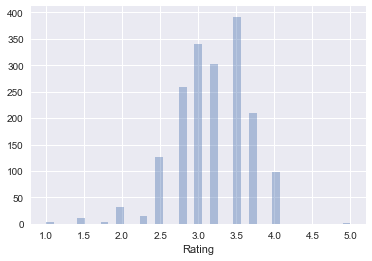

In [121]:
#Let's see the distribution of continuous variables
sb.distplot(chocolate_data['Rating'],kde = False)
plt.show()

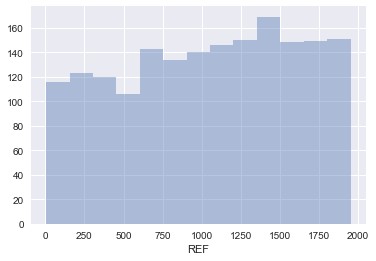

In [122]:
sb.distplot(chocolate_data['REF'],kde = False)
plt.show()

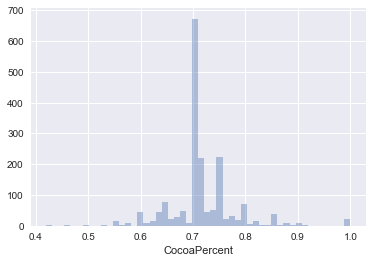

In [123]:
#Let's see the distribution of continuous variables
sb.distplot(chocolate_data['CocoaPercent'],kde = False)
plt.show()

Text(0.5,1,'Boxplot, Rating for countries (+blends)')

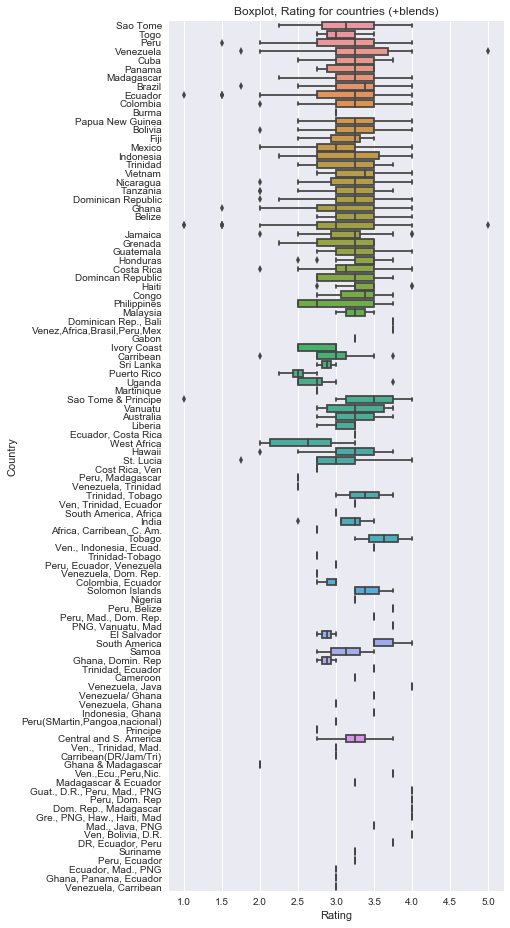

In [124]:
## Look at boxplot over the countries, even Blends
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=chocolate_data,
    y='Country',
    x='Rating'
)
ax.set_title('Boxplot, Rating for countries (+blends)')

Text(0.5,1,'Boxplot, Rating by Blend/Pure')

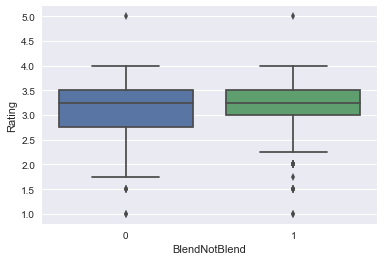

In [126]:
sns.boxplot(
    data=chocolate_data,
    x='BlendNotBlend',
    y='Rating',
)
ax.set_title('Boxplot, Rating by Blend/Pure')

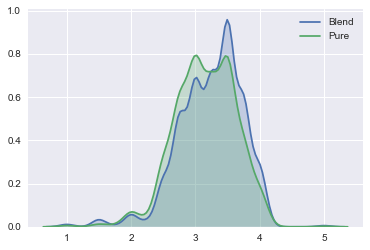

In [132]:
Blended = chocolate_data.loc[chocolate_data.BlendNotBlend == 1]
NotBlended = chocolate_data.loc[chocolate_data.BlendNotBlend == 0]
ax = sns.kdeplot(Blended.Rating,
                  shade=True,shade_lowest=False, label = "Blend")
ax = sns.kdeplot(NotBlended.Rating,
                  shade=True,shade_lowest=False, label = "Pure")

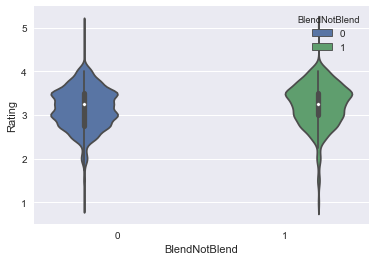

In [98]:
ax = sns.violinplot(x="BlendNotBlend", y="Rating", data=chocolate_data, hue="BlendNotBlend")